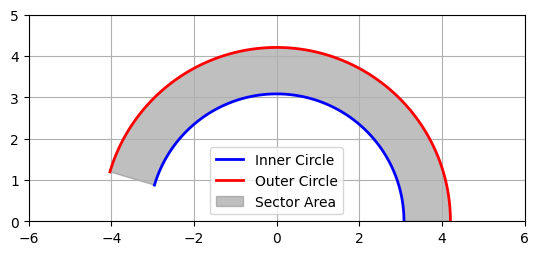

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的图形窗口
plt.subplots()

# 定义扇环的参数
center = (0, 0)  # 扇环的中心坐标
inner_radius = 3.082 # 内圆的半径
outer_radius = 4.206# 外圆的半径
start_angle = 0  # 起始角度（以度为单位）
end_angle = 163.49 # 结束角度（以度为单位）

# 创建扇环的路径
theta = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
x_inner = inner_radius * np.cos(theta) + center[0]
y_inner = inner_radius * np.sin(theta) + center[1]
x_outer = outer_radius * np.cos(theta) + center[0]
y_outer = outer_radius * np.sin(theta) + center[1]

# 绘制扇环的内圆和外圆
plt.plot(x_inner, y_inner, color='b', linewidth=2, label='Inner Circle')
plt.plot(x_outer, y_outer, color='r', linewidth=2, label='Outer Circle')

# 填充扇形区域
theta_fill = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
x_fill = np.concatenate((inner_radius * np.cos(theta_fill), 
                         outer_radius * np.cos(theta_fill[::-1])))
y_fill = np.concatenate((inner_radius * np.sin(theta_fill), 
                         outer_radius * np.sin(theta_fill[::-1])))
plt.fill(x_fill, y_fill, color='gray', alpha=0.5, label='Sector Area')

# # 设置绘图区域的范围
plt.xlim(-6, 6)
plt.ylim(0, 5)

# 添加标题和标签
# plt.title("Annular Sector")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.xticks([]),plt.yticks([]) # to hide values on x and y axis

# 添加图例
plt.legend()

# 显示图形
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

# 保存图像为文件（可以选择不同的文件格式，如PNG、JPEG等）
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')  # 设置DPI并保存图像

plt.show()

In [2]:
import cv2
import numpy as np

# 创建一张A4纸大小的空白图像，通常使用300 DPI分辨率
width, height = int(21000), int(29700)  # 将英寸转换为像素
a4_paper = np.ones((height, width, 3), np.uint8) * 255  # 创建一个白色背景图像

# 导入自定义大小的图像并调整大小以适应A4纸
image = cv2.imread('my_plot.png')  # 替换为您的图像文件路径

# 计算目标尺寸
target_width = int(1673)
target_height = int(992)

# 检查目标尺寸是否合法
if target_width > 0 and target_height > 0:
    image = cv2.resize(image, (target_width, target_height))

    # 在A4背景图像上绘制导入的图像，放置在A4中央
    x_offset = (a4_paper.shape[1] - image.shape[1]) // 2
    y_offset = (a4_paper.shape[0] - image.shape[0]) // 2
    a4_paper[y_offset:y_offset + image.shape[0], x_offset:x_offset + image.shape[1]] = image

    
    # 保存生成的图像
    cv2.imwrite('output_image.png', a4_paper)
else:
    print("目标尺寸无效")

只用opencv

In [1]:
import numpy as np
import cv2

# 创建一个空白图像，例如 500x500 像素的白色图像
width, height = int(21000), int(29700)
image = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇形的参数
center = (5000, 0)  # 扇形的中心坐标
in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 255, 0)  # 扇形的颜色，这里是绿色
inner_color = (255,0,0)
thickness = -1  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(image, center, (radius, radius), 0, start_angle, end_angle, color, thickness)
cv2.ellipse(image, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness)


# 保存绘制好的图像
cv2.imwrite('sector.png', image)

# # 显示图像
# cv2.imshow('Sector', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [7]:
import numpy as np
import cv2 as cv

img = [cv.imread]()

<>:4: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
<>:4: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
C:\Users\daichang\AppData\Local\Temp\ipykernel_23100\2068076129.py:4: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?
  img = [cv.imread]('my_plot.png')


TypeError: 'list' object is not callable